# Análise de Clusteres

## Contexto do Notebook

Este notebook é uma continuação da EDA realizada neste outro [nootebook](https://colab.research.google.com/drive/1VT44_3eHHwkYL12pXZiYmuQdfA8iv6OW#scrollTo=gZm8InjSbj0P). Nesse sentido, aqui conduzirei uma análise de clusterização utilizando o algoritmo de PCA (Análise de Componentes Principais) com o objetivo de segmentar dados em quatro clusters distintos. A PCA será utilizada para reduzir a dimensionalidade dos dados, facilitando a identificação de padrões e a segmentação dos dados em grupos mais homogêneos.

- Objetivos do Notebook

1. Realizar uma redução de dimensionalidade utilizando PCA.
2. Segmentar os dados em quatro clusters distintos.
3. Interpretar os resultados da clusterização e identificar características comuns em cada grupo.
4. Salvar a base clusterizada para a equipe de Marketing
5. Gerar um relatório de recomendações com base na análise feita

- Resultados Esperados

Espera-se obter uma segmentação clara dos dados em quatro clusters distintos, o que permitirá uma melhor compreensão dos padrões presentes nos dados e a identificação de possíveis insights e recomendações para tomada de decisões.


## Importação das bibliotecas e base de dados

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
# Visualização e Manipulação dos Dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Ignorar os avisos para exibir apenas os gráficos
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importação da base de dados
base_original = pd.read_csv('/content/Marketing_data.csv')

In [4]:
# Criando uma cópia da base original
base = base_original.copy()

## Tratamentos anteriores

In [5]:
#Substituindo
base.loc[(base['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = base['MINIMUM_PAYMENTS'].median()
#Substituindo
base.loc[(base['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = base['CREDIT_LIMIT'].mean()

In [6]:
# Excluindo a coluna 'CUST_ID' que não irá influenciar na análise. Essa coluna serve apenas para identificação do cliente
base.drop('CUST_ID', axis = 1, inplace = True)

In [7]:
# Normalizando os dados para que os algoritmos não considerem alguns atributos mais impotantes que outros:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
base_scaled = scaler.fit_transform(base)

## Definindo Clusters

Vamos usar novamente o método Elbow para vizualizar e definir o numero ideal de clusters

In [8]:
# Importando o algoritmo Kmeans
from sklearn.cluster import KMeans

# Calculando o "Within-Cluster Sum of Squares" (WCSS) para diferentes números
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(base_scaled)
  wcss_1.append(kmeans.inertia_)

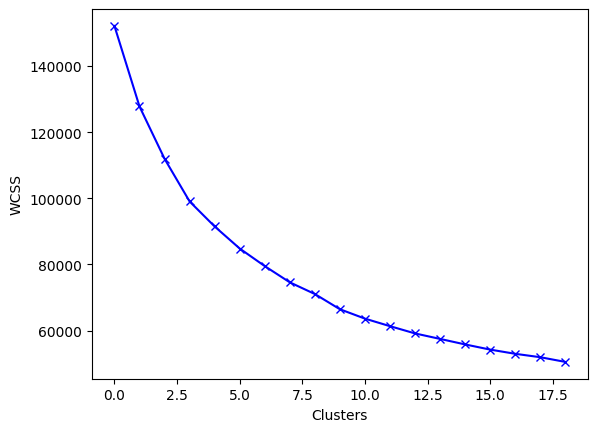

In [9]:
# Exibindo o valor do WCSS em relação ao número de clusters.
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

Conforme indicado no notebook anterior, o número ideal de clusters foi inicialmente considerado como sendo 8. No entanto, a implementação de campanhas de marketing direcionadas a 8 grupos pode resultar em custos significativos, com potencial retorno financeiro limitado para o banco.

Após análise do gráfico, observa-se que a métrica de avaliação WCSS (Within-Cluster Sum of Squares) demonstra uma redução acentuada ao reduzir o número de clusters para 4.

Portanto, optei por dividir os dados em 4 grupos utilizando o algoritmo KMeans. Em seguida, aplicarei a técnica de Análise de Componentes Principais (PCA) para visualizar e compreender melhor a distribuição desses grupos, a fim de desenvolver estratégias de marketing mais eficazes e economicamente viáveis.

## Clusterização com PCA e K-Means

A segmentação de clientes é uma estratégia crucial para entender melhor o comportamento e as necessidades dos clientes, permitindo uma abordagem mais personalizada e eficaz em estratégias de marketing e vendas. Neste relatório, exploro as razões pelas quais optei por usar os algoritmos KMeans e PCA para realizar a segmentação de clientes em nosso contexto.

Justificativa:

1. Identificação de Grupos Distintos: O algoritmo KMeans é amplamente reconhecido por sua capacidade de identificar grupos distintos em conjuntos de dados. Ao aplicar o KMeans à nossa base de dados de clientes, podemos segmentá-los em grupos com características semelhantes de comportamento de compra, preferências e necessidades.

2. Personalização de Ofertas: Com a segmentação de clientes, podemos personalizar nossas ofertas e comunicações para atender às necessidades específicas de cada grupo. Isso aumenta a relevância de nossas mensagens e produtos, melhorando a experiência do cliente e aumentando a probabilidade de conversão.

3. Eficiência de Marketing: Ao entender melhor nossos clientes e seus padrões de comportamento, podemos otimizar nossas estratégias de marketing para direcionar recursos de forma mais eficiente. Isso inclui a alocação de orçamento de marketing, a seleção de canais de comunicação mais eficazes e o desenvolvimento de campanhas mais direcionadas.

4. Identificação de Oportunidades de Crescimento: A segmentação de clientes não apenas melhora a eficácia de nossas estratégias existentes, mas também nos ajuda a identificar novas oportunidades de crescimento. Ao identificar grupos de clientes com necessidades não atendidas, podemos desenvolver produtos ou serviços específicos para esses segmentos, aumentando assim nossa participação de mercado.
Uso do PCA

Além do KMeans, optei por utilizar o PCA para reduzir a dimensionalidade de nossos dados de clientes. O PCA nos permite identificar as variáveis mais significativas que influenciam o comportamento do cliente, simplificando a análise e a interpretação dos dados. Isso nos ajuda a identificar padrões ocultos e segmentos de clientes de forma mais eficiente.







In [10]:
from sklearn.decomposition import PCA

# Criando o objeto PCA
pca = PCA(n_components=2)  # Escolha o número de componentes principais desejados

# Aplicando o PCA na base de dados normalizada
base_pca = pca.fit_transform(base_scaled)

Vou gerar um gráfico que mostra a segmentação dos clientes após a aplicação do algoritmo KMeans.

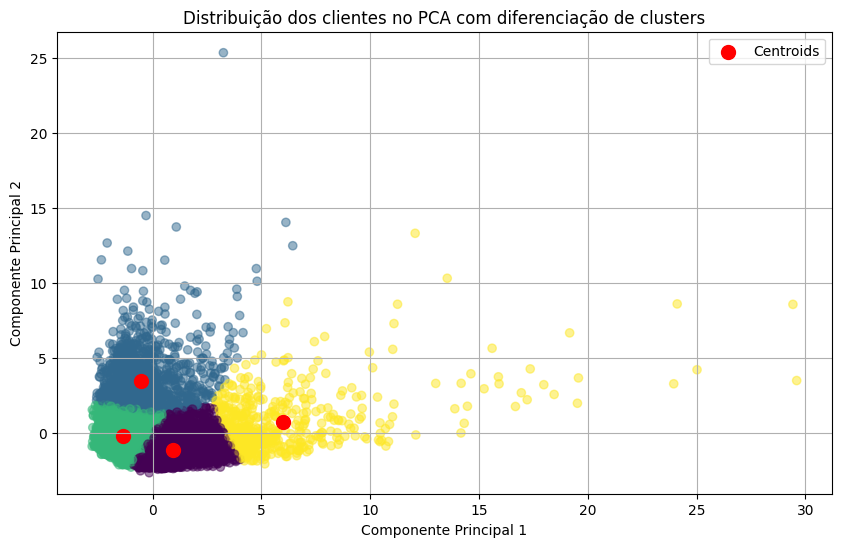

In [11]:
from sklearn.cluster import KMeans

# Criando o objeto KMeans para agrupar os clientes em 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(base_pca)

# Obtém os rótulos de cluster.
labels = kmeans.labels_

# Plotando os clientes no PCA com diferenciação de clusters
plt.figure(figsize=(10, 6))
plt.scatter(base_pca[:, 0], base_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Distribuição dos clientes no PCA com diferenciação de clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


Agora vou salvar a base de dados com uma nova coluna chamada 'CLUSTER', que contém o grupo ao qual cada cliente pertence.

In [12]:
# Adiciona os rótulos de cluster como uma coluna 'CLUSTER' ao DataFrame original
base['CLUSTER'] = labels

# Cria um novo DataFrame apenas com a coluna 'CLUSTER'
base_clusterizada = base

# Exibe o novo DataFrame
base_clusterizada.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


## Análise dos Grupos Segmentados

Vou gerar alguns dataframes e gráficos para explorar melhor as características de cada grupo segmentado. Em seguida, farei um relatório contendo os insights obtidos por essa análise.

In [13]:
# Agrupando por cluster e calculando as médias
agrupado = base_clusterizada.groupby('CLUSTER').mean().reset_index()

# Exibindo o DataFrame agrupado
agrupado

,CLUSTER,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,825.786010,0.920301,1237.583474,622.592817,615.195740,147.718821,0.862592,0.302365,0.675116,0.030723,0.570037,21.329172,4253.279614,1329.970479,583.423702,0.282922,11.661693
1,1,4505.865912,0.963515,462.628331,300.247673,162.479912,4400.456157,0.266446,0.129792,0.166388,0.470794,13.773676,6.717496,7449.201080,3542.539456,2060.458227,0.034992,11.439807
2,2,1012.015954,0.799536,222.980202,157.253826,66.055490,613.558647,0.190099,0.074731,0.110111,0.122353,2.259826,2.956100,3109.340935,855.313300,551.136406,0.066146,11.364216
3,3,3407.930310,0.988404,6901.170916,4516.913486,2385.452649,774.694615,0.954352,0.726123,0.808566,0.084975,2.368526,82.980080,9548.705179,6730.862051,1831.212618,0.286595,11.960159


In [14]:
# Para verificar o número de clientes distribuídos em cada cluster
contagem_clusters = base_clusterizada['CLUSTER'].value_counts()

contagem_clusters

CLUSTER
2    3918
0    3284
1    1246
3     502
Name: count, dtype: int64

Percebe-se uma boa divisão no número de clientes por cluster.

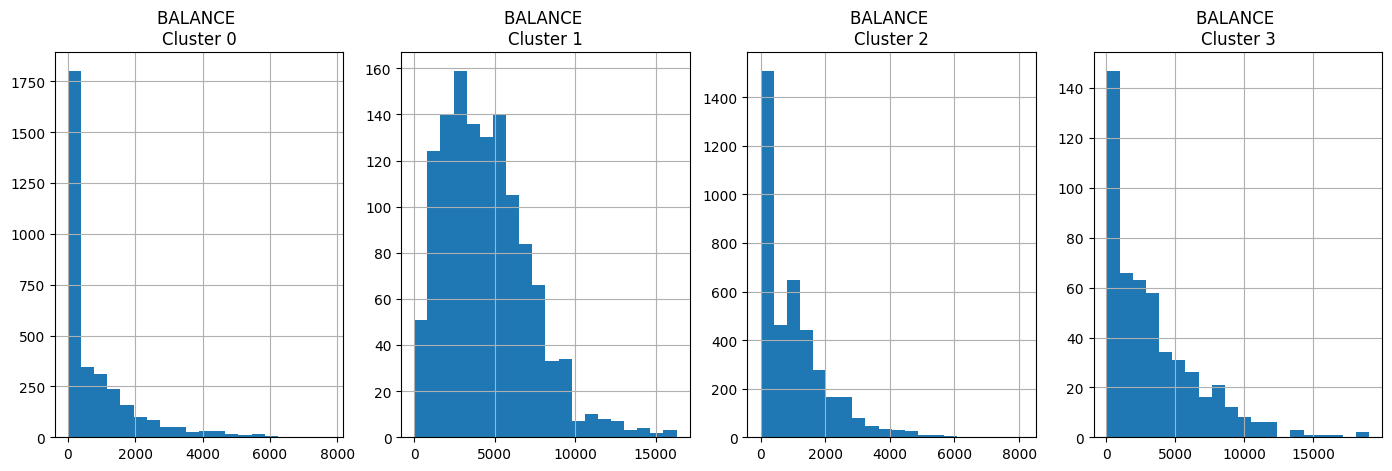

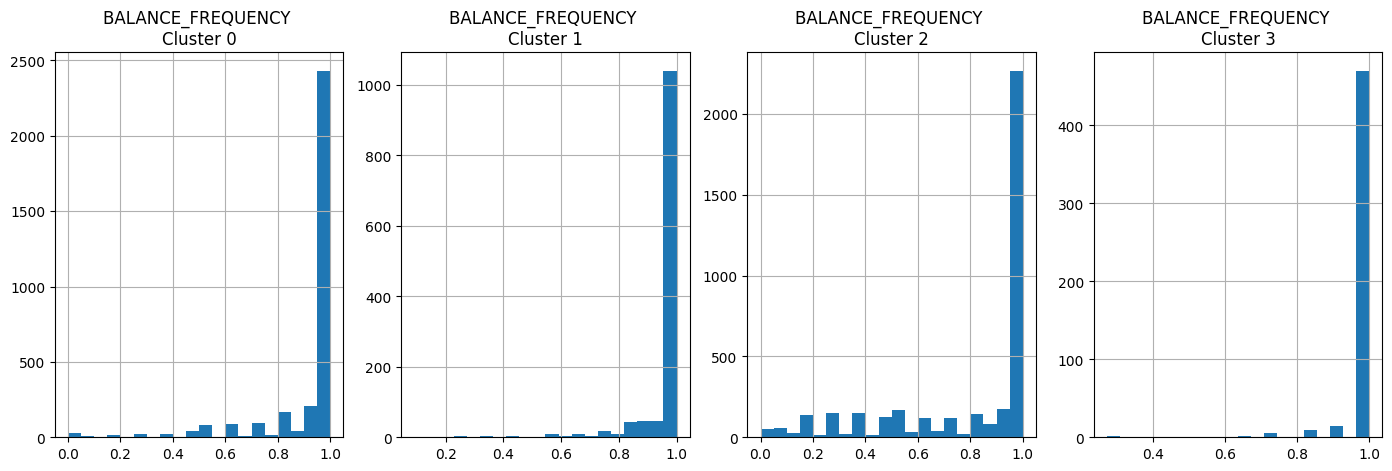

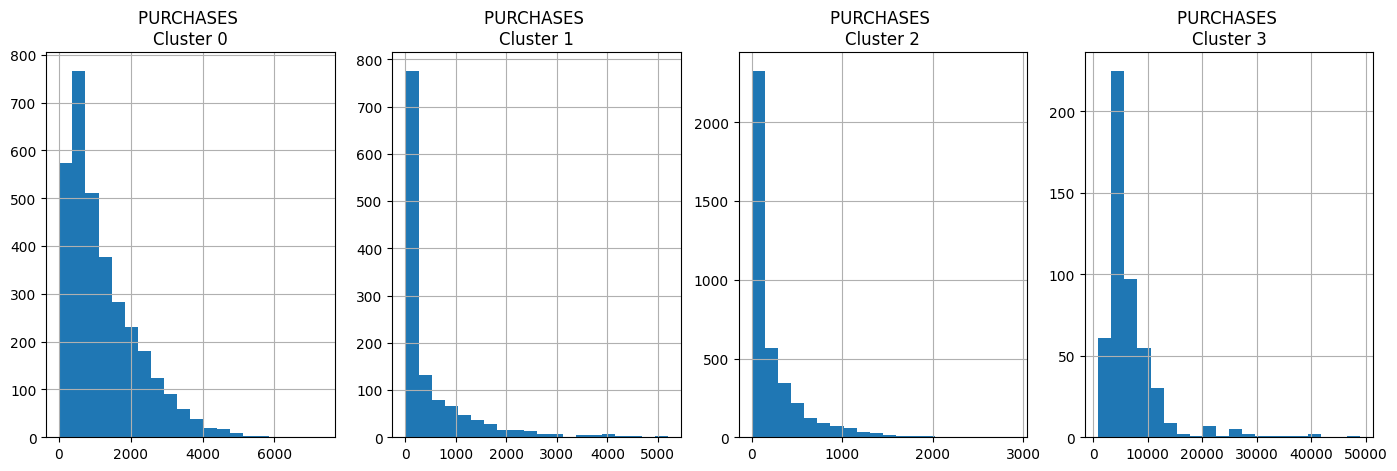

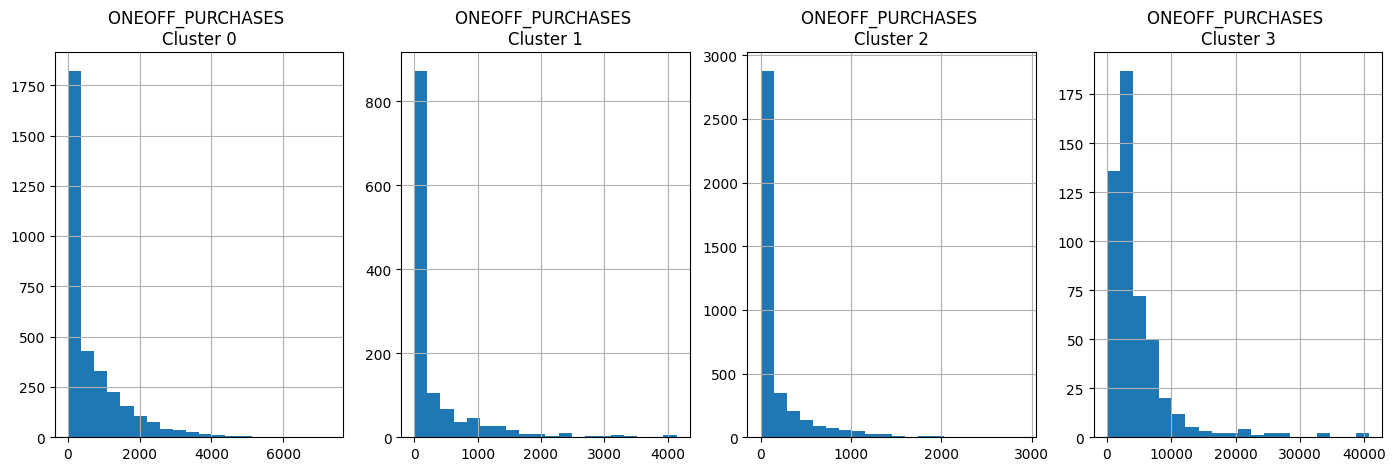

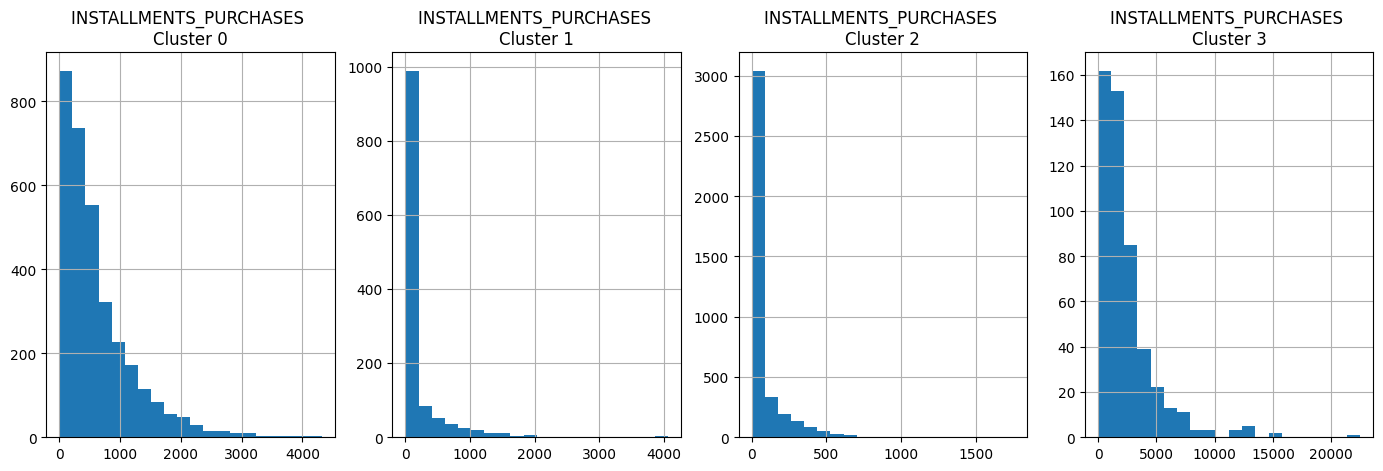

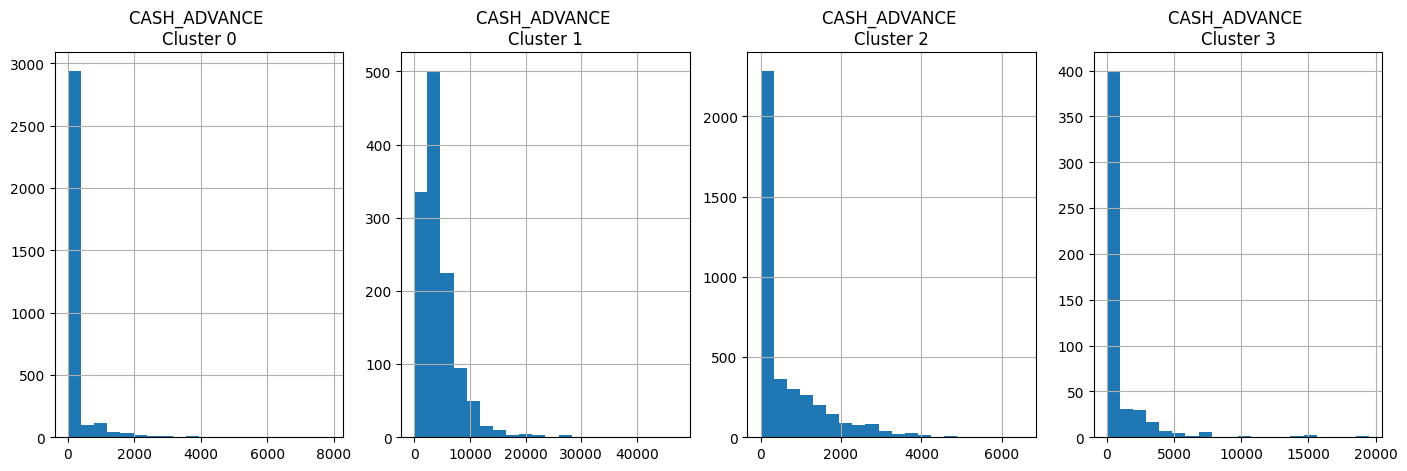

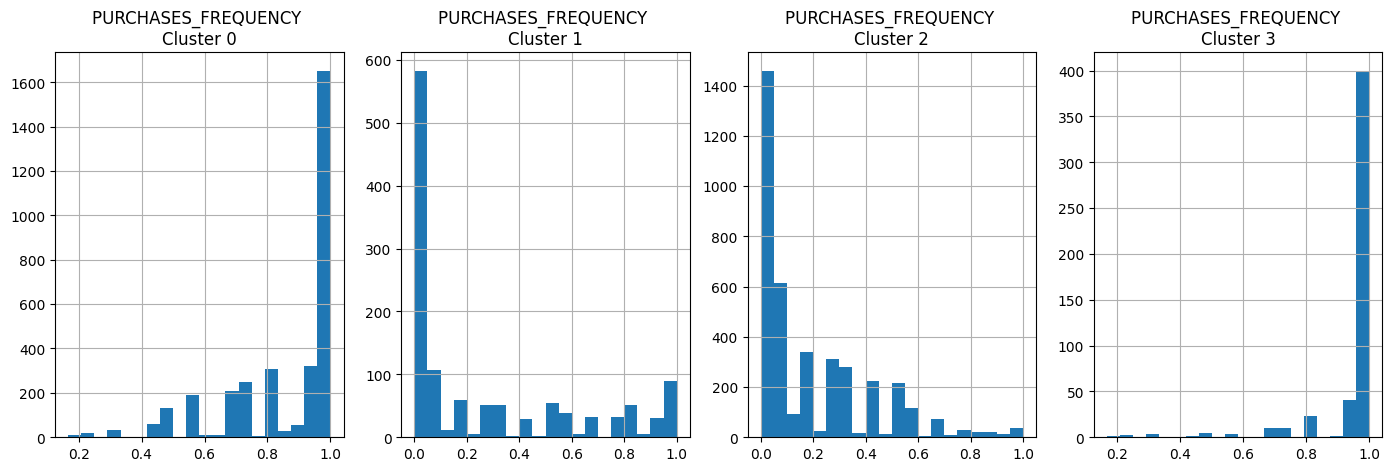

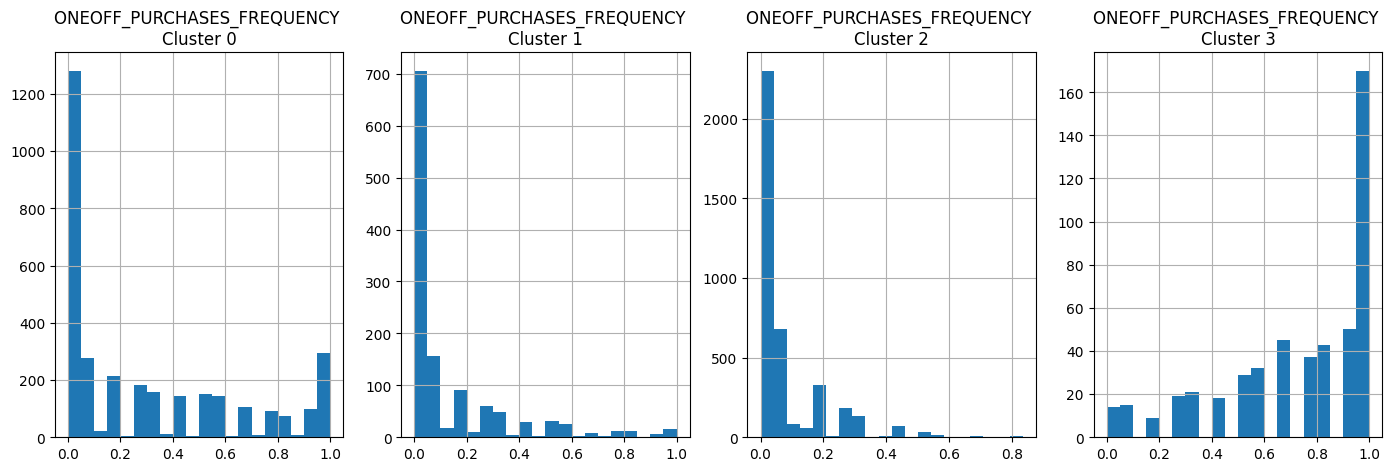

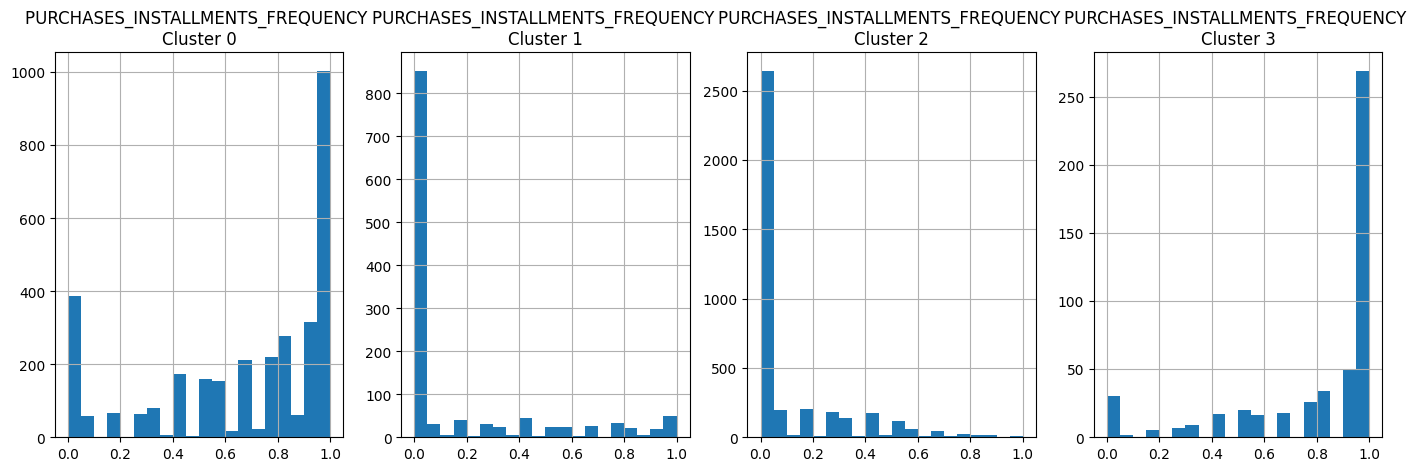

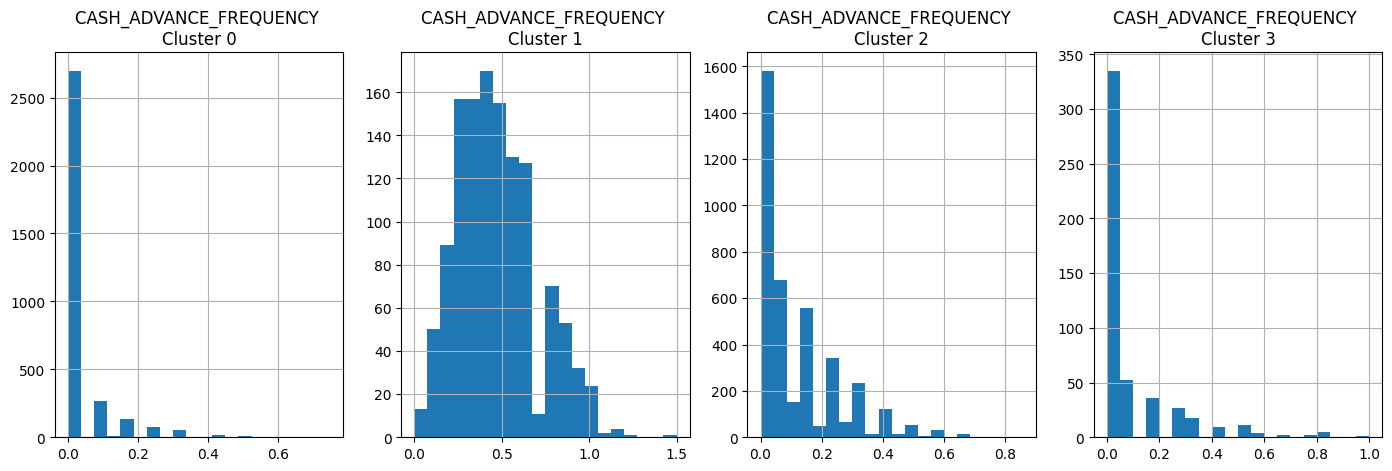

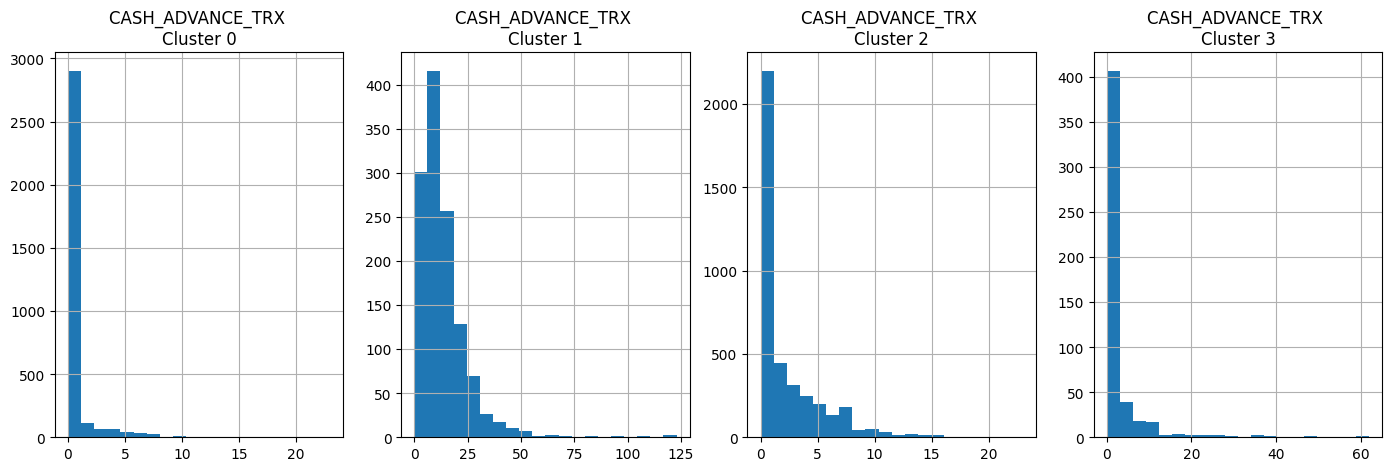

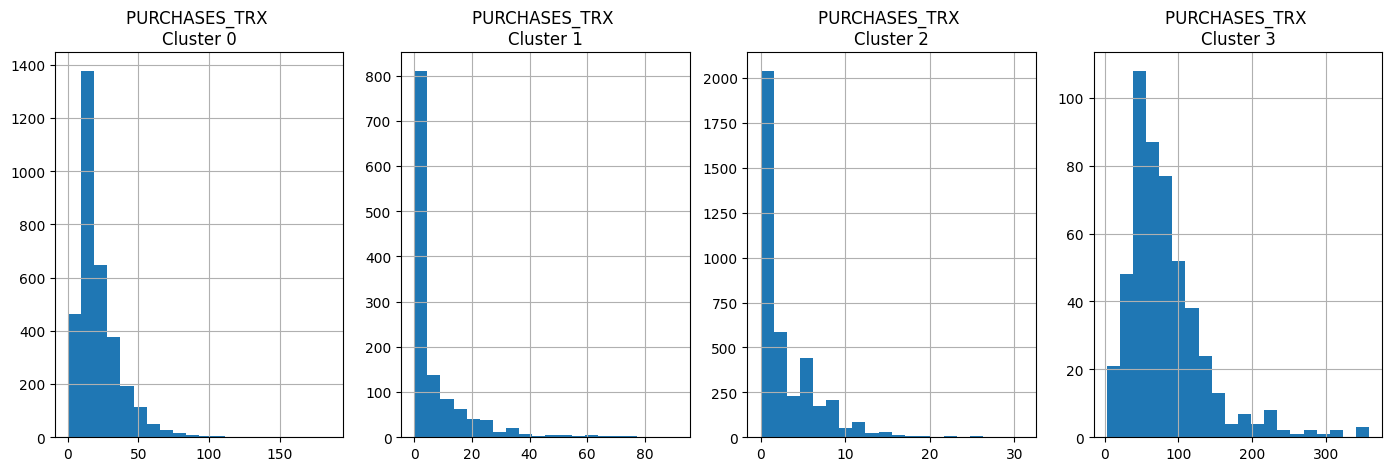

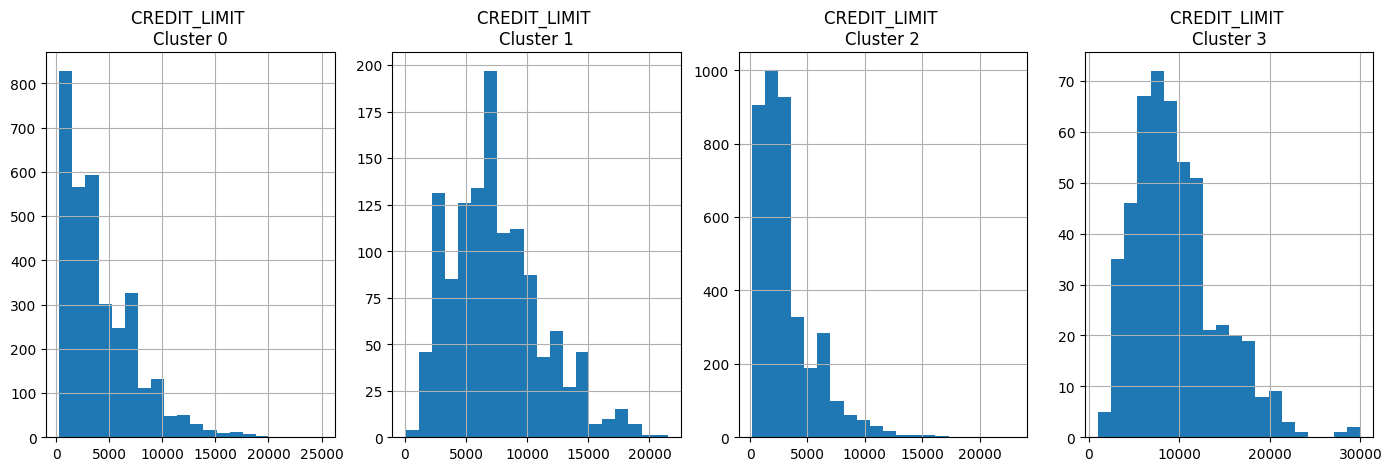

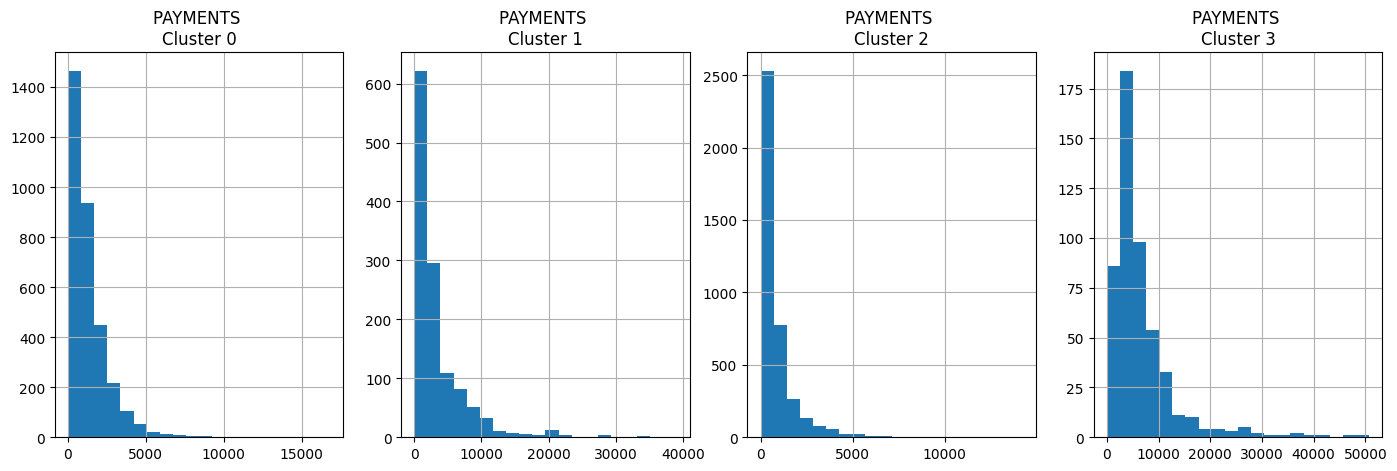

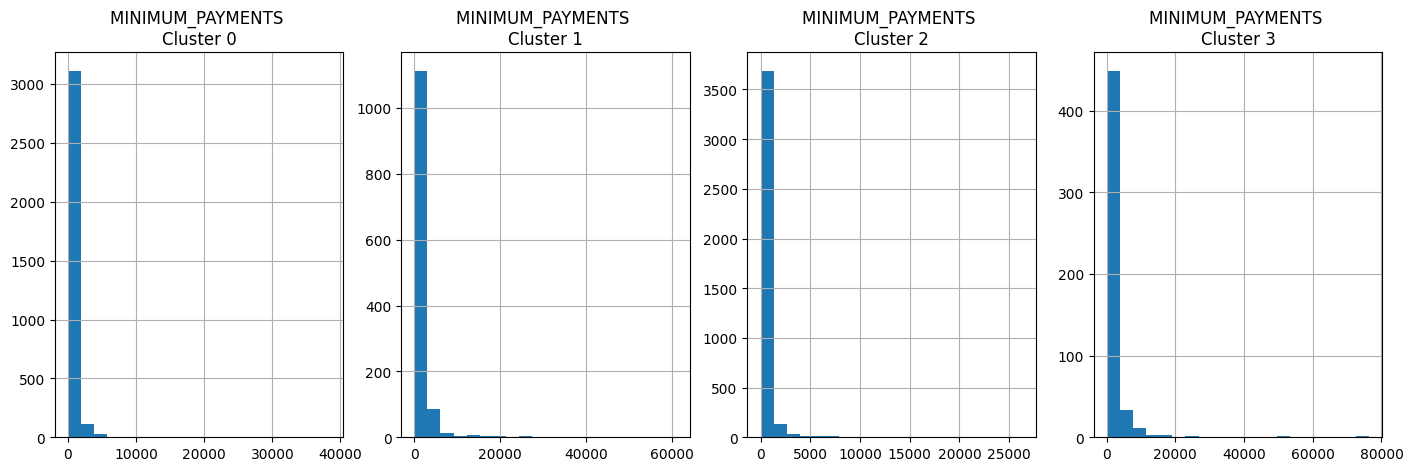

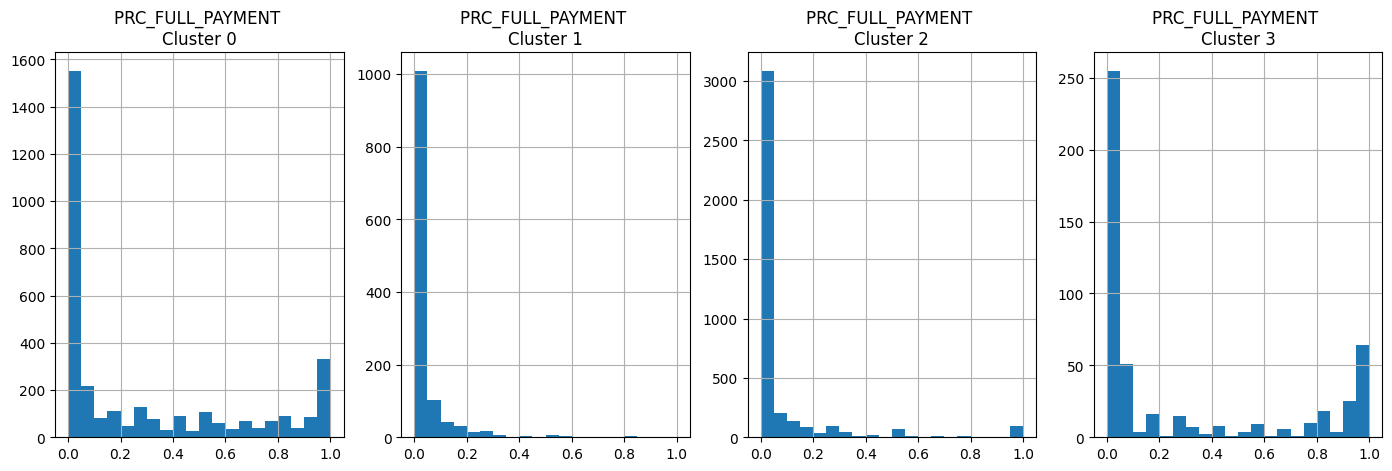

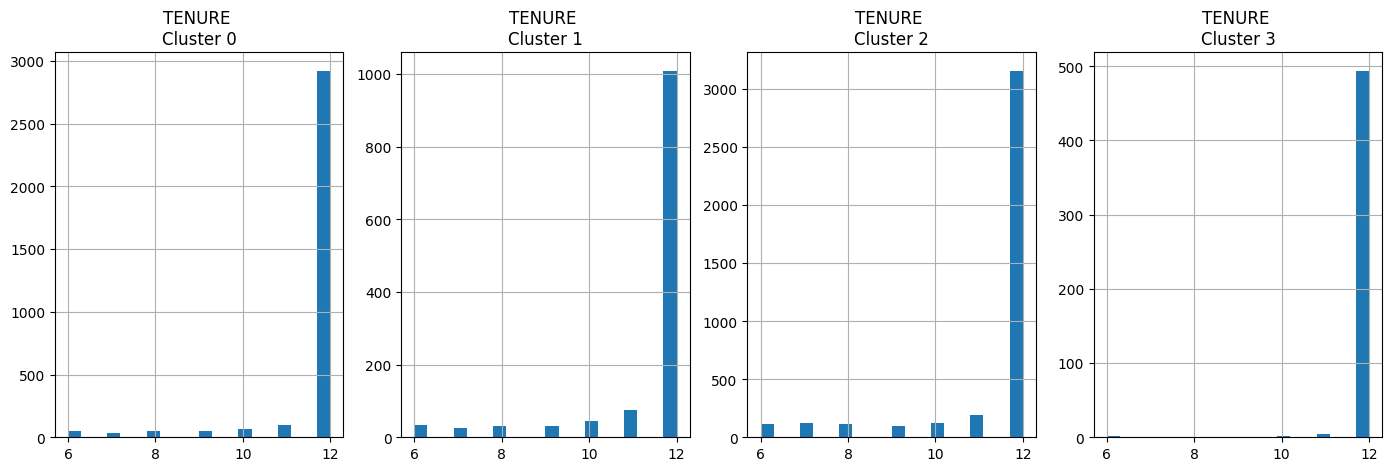

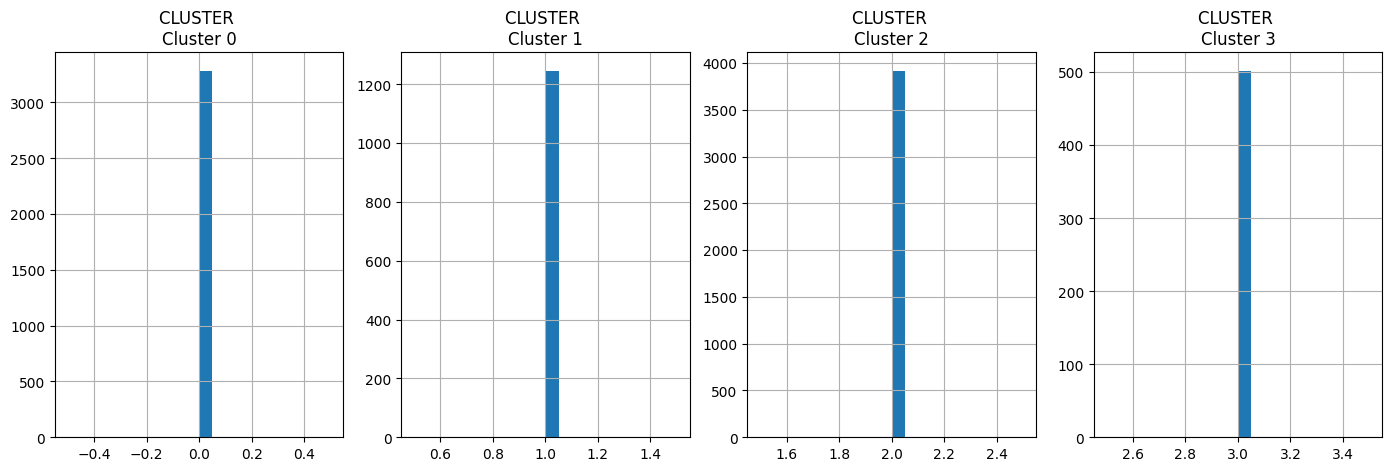

In [15]:
# Gerando os histogramas
for i in base_clusterizada.columns:
  plt.figure(figsize=(35,5))
  for j in range(4):
    plt.subplot(1, 8, j + 1)
    cluster = base_clusterizada[base_clusterizada['CLUSTER'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

Vou utilizar um modelo de Random Forest para identificar os 10 principais atributos que influenciam na classificação de cada tipo de cluster. Essa análise é importante para identificar possíveis estratégias de marketing com base na análise desses atributos.

In [16]:
# Separar os dados em atributos (X) e classe (y), dropando as colunas 'CLUSTER'
X = base_clusterizada.drop(['CLUSTER'], axis=1)
y = base_clusterizada['CLUSTER']

# Criar um modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Treinar o modelo
rf.fit(X, y)

# Obter a importância de cada atributo
importancias_atributos = rf.feature_importances_

# Criar um DataFrame com os nomes dos atributos e suas importâncias
df_importancias = pd.DataFrame({'Atributo': X.columns, 'Importância': importancias_atributos})
df_importancias = df_importancias.sort_values(by='Importância', ascending=False)

df_importancias.head(10)

,Atributo,Importância
11,PURCHASES_TRX,0.158772
6,PURCHASES_FREQUENCY,0.155834
5,CASH_ADVANCE,0.087373
2,PURCHASES,0.086657
10,CASH_ADVANCE_TRX,0.074049
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.066575
0,BALANCE,0.061800
9,CASH_ADVANCE_FREQUENCY,0.060845
4,INSTALLMENTS_PURCHASES,0.049043
13,PAYMENTS,0.045623


Vou gerar gráficos para cada atributo mais importante em relação a cada tipo de cluster.

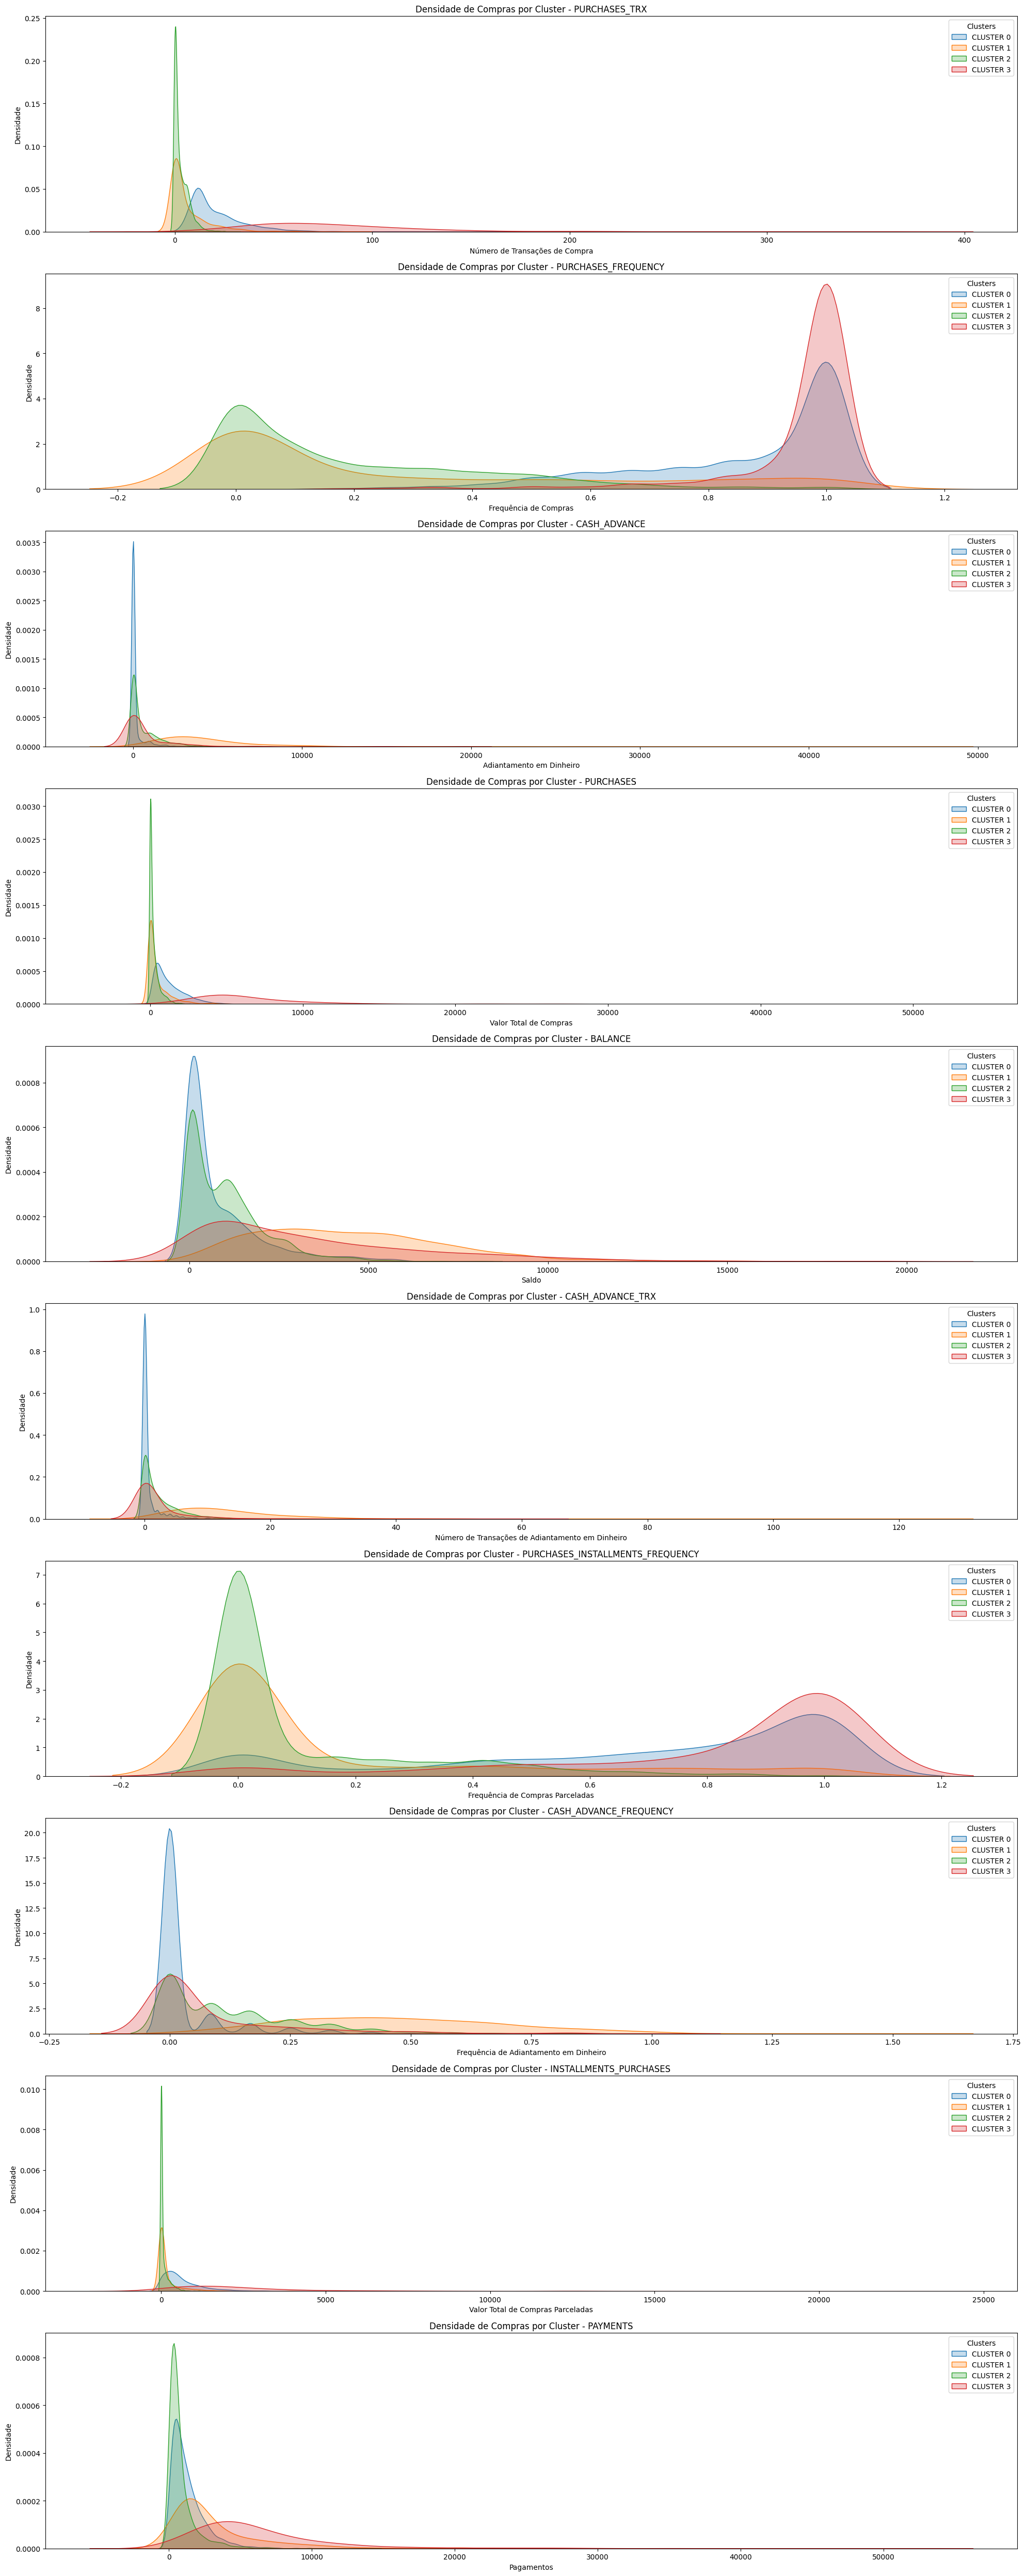

In [17]:
plt.figure(figsize=[20, 50])

# Atributo 11: PURCHASES_TRX
plt.subplot(10, 1, 1)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 0, 'PURCHASES_TRX'], label='CLUSTER 0', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 1, 'PURCHASES_TRX'], label='CLUSTER 1', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 2, 'PURCHASES_TRX'], label='CLUSTER 2', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 3, 'PURCHASES_TRX'], label='CLUSTER 3', shade=True)
plt.title('Densidade de Compras por Cluster - PURCHASES_TRX')
plt.xlabel('Número de Transações de Compra')
plt.ylabel('Densidade')
plt.legend(title='Clusters')

# Atributo 6: PURCHASES_FREQUENCY
plt.subplot(10, 1, 2)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 0, 'PURCHASES_FREQUENCY'], label='CLUSTER 0', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 1, 'PURCHASES_FREQUENCY'], label='CLUSTER 1', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 2, 'PURCHASES_FREQUENCY'], label='CLUSTER 2', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 3, 'PURCHASES_FREQUENCY'], label='CLUSTER 3', shade=True)
plt.title('Densidade de Compras por Cluster - PURCHASES_FREQUENCY')
plt.xlabel('Frequência de Compras')
plt.ylabel('Densidade')
plt.legend(title='Clusters')

# Atributo 5: CASH_ADVANCE
plt.subplot(10, 1, 3)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 0, 'CASH_ADVANCE'], label='CLUSTER 0', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 1, 'CASH_ADVANCE'], label='CLUSTER 1', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 2, 'CASH_ADVANCE'], label='CLUSTER 2', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 3, 'CASH_ADVANCE'], label='CLUSTER 3', shade=True)
plt.title('Densidade de Compras por Cluster - CASH_ADVANCE')
plt.xlabel('Adiantamento em Dinheiro')
plt.ylabel('Densidade')
plt.legend(title='Clusters')

# Atributo 2: PURCHASES
plt.subplot(10, 1, 4)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 0, 'PURCHASES'], label='CLUSTER 0', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 1, 'PURCHASES'], label='CLUSTER 1', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 2, 'PURCHASES'], label='CLUSTER 2', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 3, 'PURCHASES'], label='CLUSTER 3', shade=True)
plt.title('Densidade de Compras por Cluster - PURCHASES')
plt.xlabel('Valor Total de Compras')
plt.ylabel('Densidade')
plt.legend(title='Clusters')

# Atributo 0: BALANCE
plt.subplot(10, 1, 5)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 0, 'BALANCE'], label='CLUSTER 0', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 1, 'BALANCE'], label='CLUSTER 1', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 2, 'BALANCE'], label='CLUSTER 2', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 3, 'BALANCE'], label='CLUSTER 3', shade=True)
plt.title('Densidade de Compras por Cluster - BALANCE')
plt.xlabel('Saldo')
plt.ylabel('Densidade')
plt.legend(title='Clusters')

# Atributo 10: CASH_ADVANCE_TRX
plt.subplot(10, 1, 6)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 0, 'CASH_ADVANCE_TRX'], label='CLUSTER 0', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 1, 'CASH_ADVANCE_TRX'], label='CLUSTER 1', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 2, 'CASH_ADVANCE_TRX'], label='CLUSTER 2', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 3, 'CASH_ADVANCE_TRX'], label='CLUSTER 3', shade=True)
plt.title('Densidade de Compras por Cluster - CASH_ADVANCE_TRX')
plt.xlabel('Número de Transações de Adiantamento em Dinheiro')
plt.ylabel('Densidade')
plt.legend(title='Clusters')

# Atributo 8: PURCHASES_INSTALLMENTS_FREQUENCY
plt.subplot(10, 1, 7)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'], label='CLUSTER 0', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 1, 'PURCHASES_INSTALLMENTS_FREQUENCY'], label='CLUSTER 1', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 2, 'PURCHASES_INSTALLMENTS_FREQUENCY'], label='CLUSTER 2', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 3, 'PURCHASES_INSTALLMENTS_FREQUENCY'], label='CLUSTER 3', shade=True)
plt.title('Densidade de Compras por Cluster - PURCHASES_INSTALLMENTS_FREQUENCY')
plt.xlabel('Frequência de Compras Parceladas')
plt.ylabel('Densidade')
plt.legend(title='Clusters')

# Atributo 9: CASH_ADVANCE_FREQUENCY
plt.subplot(10, 1, 8)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 0, 'CASH_ADVANCE_FREQUENCY'], label='CLUSTER 0', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 1, 'CASH_ADVANCE_FREQUENCY'], label='CLUSTER 1', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 2, 'CASH_ADVANCE_FREQUENCY'], label='CLUSTER 2', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 3, 'CASH_ADVANCE_FREQUENCY'], label='CLUSTER 3', shade=True)
plt.title('Densidade de Compras por Cluster - CASH_ADVANCE_FREQUENCY')
plt.xlabel('Frequência de Adiantamento em Dinheiro')
plt.ylabel('Densidade')
plt.legend(title='Clusters')

# Atributo 4: INSTALLMENTS_PURCHASES
plt.subplot(10, 1, 9)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 0, 'INSTALLMENTS_PURCHASES'], label='CLUSTER 0', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 1, 'INSTALLMENTS_PURCHASES'], label='CLUSTER 1', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 2, 'INSTALLMENTS_PURCHASES'], label='CLUSTER 2', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 3, 'INSTALLMENTS_PURCHASES'], label='CLUSTER 3', shade=True)
plt.title('Densidade de Compras por Cluster - INSTALLMENTS_PURCHASES')
plt.xlabel('Valor Total de Compras Parceladas')
plt.ylabel('Densidade')
plt.legend(title='Clusters')

# Atributo 13: PAYMENTS
plt.subplot(10, 1, 10)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 0, 'PAYMENTS'], label='CLUSTER 0', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 1, 'PAYMENTS'], label='CLUSTER 1', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 2, 'PAYMENTS'], label='CLUSTER 2', shade=True)
sns.kdeplot(base_clusterizada.loc[base_clusterizada['CLUSTER'] == 3, 'PAYMENTS'], label='CLUSTER 3', shade=True)
plt.title('Densidade de Compras por Cluster - PAYMENTS')
plt.xlabel('Pagamentos')
plt.ylabel('Densidade')
plt.legend(title='Clusters')

plt.tight_layout()
plt.show()


Após gerar essas informações, vou elaborar um relatório sobre os principais atributos e sua relação com os clusters.

### Relatório sobre os principais atributos

Neste relatório, analisaremos a importância de cada atributo no contexto da segmentação de clientes de um banco. Os valores de importância foram obtidos a partir de um método de análise específico e representam a contribuição de cada atributo para o processo de clustering.

1. **PURCHASES_TRX (0.158772)**:
   - Este atributo representa o número de transações de compra realizadas pelo cliente. Sua alta importância sugere que a frequência de compras é um fator crucial na segmentação dos clientes. Clientes com um alto número de transações podem ser classificados como compradores frequentes e engajados.

2. **PURCHASES_FREQUENCY (0.155834)**:
   - A frequência de compras é outro indicador importante. Clientes com uma alta frequência de compras podem ser mais propensos a responder a campanhas de marketing que visam aumentar a fidelidade à marca.

3. **CASH_ADVANCE (0.087373)**:
   - O adiantamento em dinheiro é um aspecto do comportamento financeiro do cliente. Sua importância sugere que a forma como os clientes utilizam esse recurso pode influenciar significativamente sua segmentação.

4. **PURCHASES (0.086657)**:
   - O valor total das compras feitas pelo cliente também é um indicador relevante. Clientes com altos valores de compras podem representar uma oportunidade de vendas cruzadas ou upselling.

5. **CASH_ADVANCE_TRX (0.074049)**:
   - O número de transações de adiantamento em dinheiro realizado pelo cliente é um complemento ao atributo de adiantamento em dinheiro, fornecendo mais detalhes sobre o uso desse recurso.

6. **PURCHASES_INSTALLMENTS_FREQUENCY (0.066575)**:
   - A frequência de compras parceladas indica a preferência do cliente por esse tipo de pagamento. Isso pode ser útil para estratégias de marketing que visam incentivar compras parceladas.

7. **BALANCE (0.061800)**:
   - O saldo médio do cliente é um indicador da saúde financeira e do comportamento de pagamento. Clientes com saldos mais altos podem ser segmentados de forma diferente daqueles com saldos mais baixos.

8. **CASH_ADVANCE_FREQUENCY (0.060845)**:
   - A frequência de adiantamento em dinheiro é outra métrica importante para entender o comportamento financeiro do cliente. Clientes com uma alta frequência podem ter necessidades financeiras diferentes daqueles com baixa frequência.

9. **INSTALLMENTS_PURCHASES (0.049043)**:
   - O valor total das compras parceladas feitas pelo cliente também é um indicador relevante. Clientes que preferem parcelar suas compras podem ser segmentados de forma diferente daqueles que preferem compras únicas.

10. **PAYMENTS (0.045623)**:
    - O total de pagamentos feitos pelo cliente é um indicador da sua capacidade de pagamento e do seu comportamento financeiro geral.

Esses atributos e suas respectivas importâncias podem ser utilizados pela equipe de marketing para entender melhor os diferentes segmentos de clientes e adaptar suas estratégias de forma mais eficaz.


## Base de dados completa e clusterizada

Agora, vou retomar os dados que identificam cada cliente e salvar a base de dados já clusterizada e ordenada, para facilitar o trabalho da equipe de marketing.

In [18]:
# Restaurando a coluna 'CUST_ID' ao DataFrame
base_clusterizada['CUST_ID'] = base_original['CUST_ID']

In [19]:
# Reorganizando as colunas para que 'CUST_ID' apareça primeiro
cols = base_clusterizada.columns.tolist()
cols = ['CUST_ID'] + [col for col in cols if col != 'CUST_ID']
base_clusterizada = base_clusterizada[cols]

# Verificando
base_clusterizada

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


In [20]:
# Ordena o DataFrame 'base_clusterizada' com base na coluna 'CLUSTER'
base_clusterizada_ordenada = base_clusterizada.sort_values(by='CLUSTER')

# Exibindo as primeiras linhas para verificar a ordenação
base_clusterizada_ordenada.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
2997,C13086,233.376877,1.000000,1178.12,901.50,276.62,0.000000,1.000000,0.250000,1.000000,0.000000,0,28,6000.0,1098.390459,177.323148,0.000000,12,0
2405,C12478,10.106017,0.727273,1160.66,34.90,1125.76,0.000000,1.000000,0.083333,0.916667,0.000000,0,37,1500.0,1152.518504,32.376453,0.111111,12,0
7809,C18021,445.146763,0.857143,2118.54,950.19,1168.35,203.910421,0.857143,0.714286,0.714286,0.285714,3,27,1000.0,1443.057787,229.489434,0.400000,7,0
4584,C14710,7789.190958,1.000000,1307.39,84.45,1222.94,1836.893684,1.000000,0.166667,1.000000,0.250000,3,66,8500.0,2072.817061,2983.977594,0.000000,12,0
2409,C12482,0.000000,0.000000,313.89,0.00,313.89,0.000000,0.916667,0.000000,0.916667,0.000000,0,19,6000.0,0.000000,312.343947,0.000000,12,0


In [21]:
# Salva o DataFrame 'base_clusterizada_ordenada' em um arquivo CSV
base_clusterizada_ordenada.to_csv('cluster_ordenado.csv')

Após salvar a base, vou elaborar um relatório final contendo algumas recomendações para a equipe de marketing, baseadas na análise e segmentação dos clientes.

## Relatório Final de Sugestões para Campanhas de Marketing

### Clustering de Clientes:

#### Cluster 0 - Conservadores (3918):
- **Saldo Médio e Frequência de Compra Moderados**: Este grupo apresenta um saldo médio e uma frequência de compras moderados, indicando um comportamento mais conservador em relação ao consumo.
- **Compra de Produtos Diversificados**: Realiza compras variadas, tanto em compras únicas como parceladas, demonstrando um interesse amplo em diferentes tipos de produtos ou serviços.
- **Baixo Uso de Adiantamento em Dinheiro**: O baixo uso de adiantamento em dinheiro sugere um perfil de consumidor mais conservador e que prefere formas tradicionais de pagamento.

#### Cluster 1 - Grandes Compradores (3284):
- **Alto Saldo e Frequência de Compra Baixa**: Apresenta um saldo significativamente alto, mas com uma frequência de compras relativamente baixa, sugerindo um potencial de compra não totalmente explorado.
- **Potencial para Compras de Alto Valor**: Com um saldo elevado, este grupo pode ser mais receptivo a ofertas de produtos ou serviços premium.
- **Uso Moderado de Adiantamento em Dinheiro**: O uso moderado de adiantamento em dinheiro indica uma propensão a formas de pagamento mais tradicionais, mas com potencial para adotar opções mais sofisticadas.

#### Cluster 2 - Conservadores com Cash Advance (1246):
- **Saldo Médio e Frequência de Compra Moderados**: Possui um saldo e frequência de compra mais baixos em comparação com outros clusters, indicando um estágio inicial de relacionamento com a marca.
- **Potencial de Crescimento**: Apesar do baixo saldo atual, este grupo pode representar um mercado em crescimento com potencial para aumentar suas compras no futuro.
- **Uso Moderado de Adiantamento em Dinheiro**: Assim como o Cluster 0, este grupo também mostra uma preferência por formas de pagamento mais tradicionais.

#### Cluster 3 - Compradores em Desenvolvimento (502):
- **Alto Saldo e Frequência de Compra Alta**: Apresenta um saldo e frequência de compra significativamente altos, indicando um cliente ativo e com potencial de compra elevado.
- **Propensão a Compras Frequentes**: A alta frequência de compras sugere um cliente engajado, que valoriza a marca e está disposto a comprar com frequência.
- **Uso Baixo de Adiantamento em Dinheiro**: O baixo uso de adiantamento em dinheiro indica uma preferência por formas de pagamento mais modernas e possivelmente vantajosas, o que pode indicar um cliente mais informado e consciente financeiramente.

### Sugestões para o Marketing:

1. **Cluster 0 (Conservadores)**:
   - Oferecer programas de fidelidade para incentivar compras parceladas.
   - Disponibilizar opções de parcelamento sem juros.

2. **Cluster 1 (Grandes Compradores)**:
   - Oferecer cartões de crédito com limites maiores para incentivar compras mais frequentes.

3. **Cluster 2 (Conservadores com Cash Advance)**:
   - Oferecer promoções de Cash Advance com taxas especiais para incentivar seu uso.

4. **Cluster 3 (Compradores em Desenvolvimento)**:
   - Criar campanhas de marketing personalizadas para incentivar compras frequentes.
   - Oferecer produtos financeiros personalizados com limites de crédito mais altos.

Essas sugestões podem ajudar a equipe de marketing a direcionar suas estratégias de forma mais eficaz, considerando as características e comportamentos de cada grupo de clientes.
